In [10]:
%load_ext autoreload
%autoreload 2
from funcs import readin, show_adj_matrix, obj_function, adjmatrix2adjmap, GreedySPlex
import numpy as np

from itertools import chain

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
S, A, W = readin('data/test1.txt')
N = A.shape[0]
A1 = np.zeros(A.shape)


In [12]:
import networkx as nx

G = nx.from_numpy_array(A)
for g in nx.connected_components(G):
    print(A[list(g)])

[[0 1 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [0 0 1 1 0 1 1 0 0]
 [0 0 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 1 0]]


In [13]:
def is_splex( A: np.ndarray,  s: int) -> bool:
    G = nx.from_numpy_array(A)

    for cc in nx.connected_components(G):
        if not is_splex_component(cc, s, A):
            return False
        
    return True


def is_splex_component(component : set, s: int, A: np.ndarray = A):
    component = list(component)
    neighbor_degrees = A[component].sum(axis=1)
    return (neighbor_degrees >= neighbor_degrees.shape[0] - s).sum() > 0 
    
is_splex(A, 3)

False

In [546]:
sum([not is_splex(GreedySPlex(A,W,S).random_solution()[0], S) for _ in range(10000)])

0

In [542]:
solver = GreedySPlex(A,W,3)
A1, splexes = solver.random_solution()
splexes, is_splex(A1,3), obj_function(A,A1,W)

Considering [4,5]
	Fast merge.
Considering [2,4]
	Fast merge.
Considering [0,1]
	Fast merge.
Considering [4,6]
	Fast merge.
Considering [0,3]
	Fast merge.
Considering [2,3]
	Candidate Merging {2, 4, 5, 6} U {0, 1, 3}
		Considering 2, missing: 3
		[ -99993 -100001   99999 -100002   99999  -99995  -99997       1       1]
		[3 6 1]
		Considering 4, missing: 1
		[ -99990  -99993   99999 -100005   99999   99999   99999       3       3]
		[3]
		Considering 5, missing: 3
		[ -99989  -99998  -99995  -99995   99999   99999 -100000      -1       2]
		[1 6 2]
		Considering 6, missing: 1
		[-99998 -99998  99999 -99996  99999  99999  99999      1     -1]
		[0]
		Considering 0, missing: 1
		[ 99999  99999 -99993  99999 -99990 -99989  99999      1      1]
		[2]
		Considering 1, missing: 1
		[ 99999  99999  99999 -99995 -99993  99999 -99998      1      1]
		[6]
		Considering 3, missing: 1
		[ 99999 -99995  99999  99999  99999 -99995 -99996      1      1]
		[6]
	Cost: 6
Considering [5,7]
	Candidate Mer

({0: {0, 1, 3},
  1: {0, 1, 3},
  2: {2, 4, 5, 6, 7, 8},
  3: {0, 1, 3},
  4: {2, 4, 5, 6, 7, 8},
  5: {2, 4, 5, 6, 7, 8},
  6: {2, 4, 5, 6, 7, 8},
  7: {2, 4, 5, 6, 7, 8},
  8: {2, 4, 5, 6, 7, 8}},
 True,
 26)

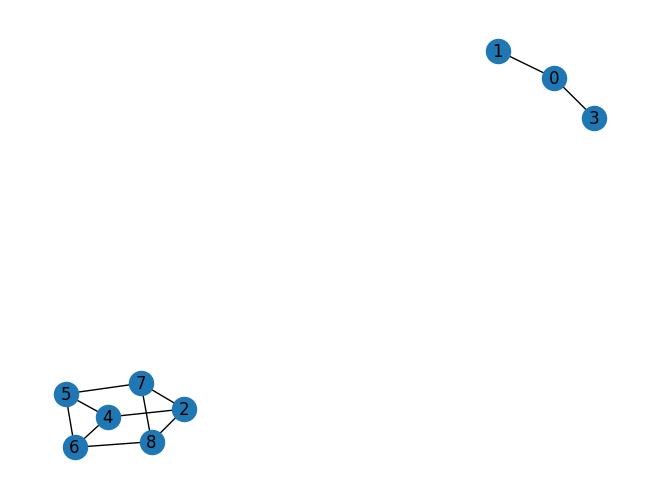

26

In [457]:
show_adj_matrix(A1)
obj_function(A,A1,W)